# 6.6 OECD & WHR Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 01 Importing your libraries and data
#### 02 Subsetting, wrangling, and cleaning time-series data
#### 03 Time series analysis: decomposition
#### 04 Testing for stationarity
#### 05 Stationarizing the Federal Reserve Economic Data
#### 06 BONUS: ARIMA Model

### 01 Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
#create data path
path = r'C:\Users\fa_an\OneDrive\CareerFoundry\Tasks\Data Analytics Immersion\Tasks 6.1-6.7'

In [3]:
#data = OECD_updated
data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'OECD_updated.pkl'))

In [4]:
data.head(5)

,Country Code,Country,UOM,Year,PPP
0,AUS,Australia,USD_PPP,1996,22709.924
1,AUS,Australia,USD_PPP,1997,23800.443
2,AUS,Australia,USD_PPP,1998,25042.830
3,AUS,Australia,USD_PPP,1999,26303.709
4,AUS,Australia,USD_PPP,2000,27416.973


In [5]:
data.shape

(1276, 5)

In [6]:
data.columns

Index(['Country Code', 'Country', 'UOM', 'Year', 'PPP'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data_2 = data[data['Country'] == 'Denmark'][['Year', 'PPP']].set_index('Year')

data_2 = data_2.sort_index()

In [9]:
data_2.head()

,PPP
Year,
1995,22711.795
1996,23746.219
1997,24928.303
1998,25820.592
1999,26657.826


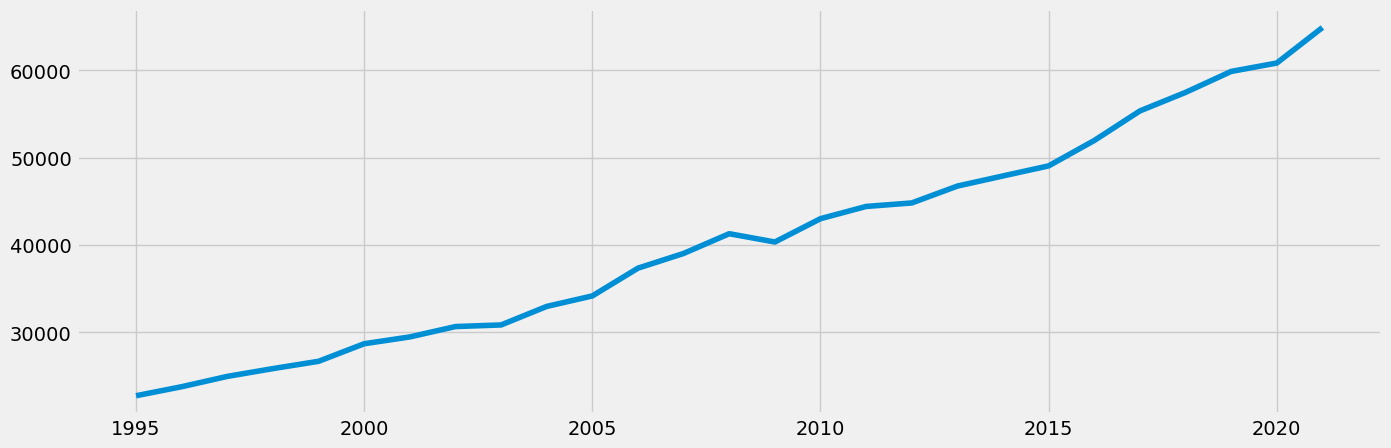

In [10]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data_2)

### 02 Subsetting, wrangling, and cleaning time-series data

In [11]:
# Reset index so that you can use the "Year" column as a filter

data_2 = data.reset_index()

In [12]:
data_2.head()

,index,Country Code,Country,UOM,Year,PPP
0,0,AUS,Australia,USD_PPP,1996,22709.924
1,1,AUS,Australia,USD_PPP,1997,23800.443
2,2,AUS,Australia,USD_PPP,1998,25042.830
3,3,AUS,Australia,USD_PPP,1999,26303.709
4,4,AUS,Australia,USD_PPP,2000,27416.973


In [13]:
# Filter the DataFrame to include data for Denmark only, along with 'Year' and 'Happiness Score'
data_sub = data_2[data_2['Country'] == 'Denmark'][['Year', 'PPP']]

In [14]:
data_sub.shape

(27, 2)

In [15]:
data_sub.head(11)

,Year,PPP
133,1995,22711.795
134,1996,23746.219
135,1997,24928.303
136,1998,25820.592
137,1999,26657.826
138,2000,28672.330
139,2001,29452.762
140,2002,30639.953
141,2003,30825.225
142,2004,32948.168


In [16]:
# Assuming 'data_sub' is your DataFrame with 'Year' column
data_sub['Year'] = pd.to_datetime(data_sub['Year'], format='%Y')

print(data_sub.head(10))


          Year        PPP
133 1995-01-01  22711.795
134 1996-01-01  23746.219
135 1997-01-01  24928.303
136 1998-01-01  25820.592
137 1999-01-01  26657.826
138 2000-01-01  28672.330
139 2001-01-01  29452.762
140 2002-01-01  30639.953
141 2003-01-01  30825.225
142 2004-01-01  32948.168


In [17]:
# Convert 'Year' to datetime if it's not already in datetime format
data_sub['Year'] = pd.to_datetime(data_sub['Year'], format='%Y')

# Set 'Year' as the index
data_sub.set_index('Year', inplace=True)

# Sort the index in ascending order
data_sub.sort_index(inplace=True)

# Display the DataFrame to verify the changes
print(data_sub)


                  PPP
Year                 
1995-01-01  22711.795
1996-01-01  23746.219
1997-01-01  24928.303
1998-01-01  25820.592
1999-01-01  26657.826
2000-01-01  28672.330
2001-01-01  29452.762
2002-01-01  30639.953
2003-01-01  30825.225
2004-01-01  32948.168
2005-01-01  34152.883
2006-01-01  37333.848
2007-01-01  39021.414
2008-01-01  41282.992
2009-01-01  40332.520
2010-01-01  43006.152
2011-01-01  44407.945
2012-01-01  44808.551
2013-01-01  46742.938
2014-01-01  47905.480
2015-01-01  49058.141
2016-01-01  51967.023
2017-01-01  55356.488
2018-01-01  57479.352
2019-01-01  59884.113
2020-01-01  60846.809
2021-01-01  64914.195


## Explain what logic you were following when selecting your data points.

Since this is a univariate time analysis, one can only use values or PPP from one country. I chose Denmark. That way I could see what the time analysis would predict for future values at the end. I tried with not listing the countries, which wouldn't make sense, but wanted to see how the values would be plotted. But, that looked a little weird. I also converted the Year to a date of YYYY-MM-DD.

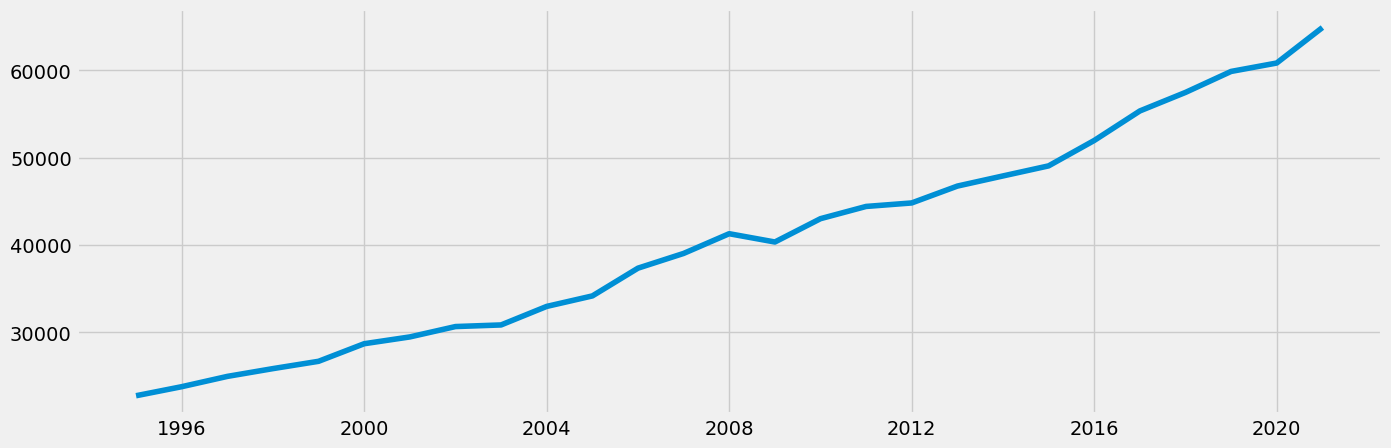

In [18]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [19]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum()

PPP    0
dtype: int64

In [20]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

### 03 Time-series analysis: decomposition

In [21]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [22]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

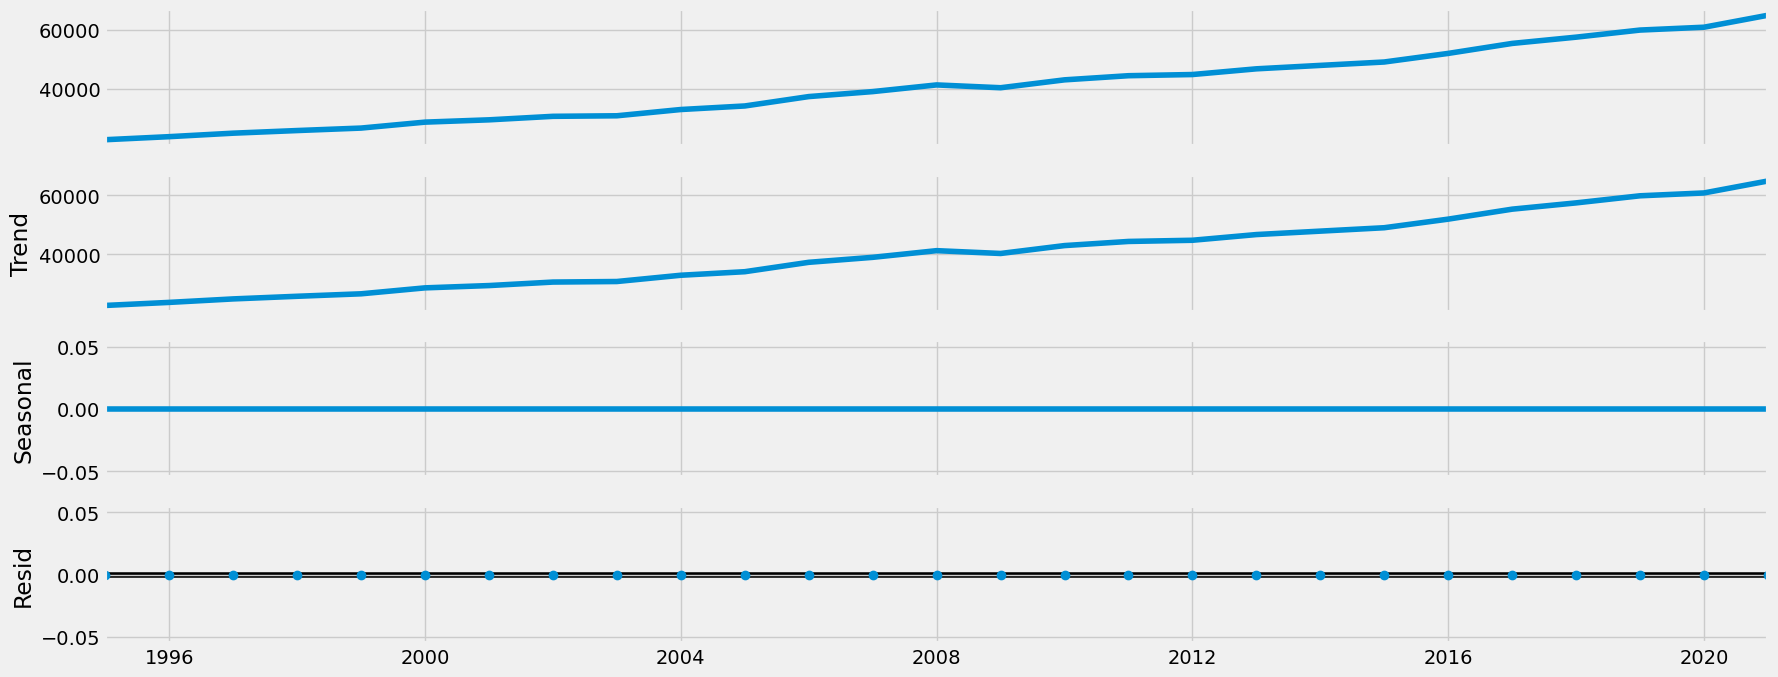

In [23]:
# Plot the separate components

decomposition.plot()
plt.show()

## Analyze the results from the plot.

The top line represents the original data, second line represents the trend, next seasonal, and lastly residual. The Seasonal and Resid show straight lines, which indicates that there is no seasonality and the data appears to be random. However, in the Trend section exhibits the same pattern as the original data, meaning that there is also no Trend. Which makes sense since this is only annual data, unlike sales data that may have many points in time during a week, month, quarter, or year.

### 04 Testing for stationarity

In [24]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['PPP'])

Dickey-Fuller Stationarity test:
Test Statistic                  2.135511
p-value                         0.998825
Number of Lags Used             0.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


## Interpret the results in a markdown cell.

The null hypothesis of this test is that the time series is non-stationary. The test aims to reject the null hypothesis. However, based on the results, the Test Stat of 2.135511 is not less than the Crit Value of 5 or 10%. Which means I CANNOT reject the null hypothesis, meaning that the data is still STATIONARY. And the p-value is much larger than the significance levels of 5 and 10% which further supports the test failing. Onto making the data stationary. See 2nd test in Section 05.


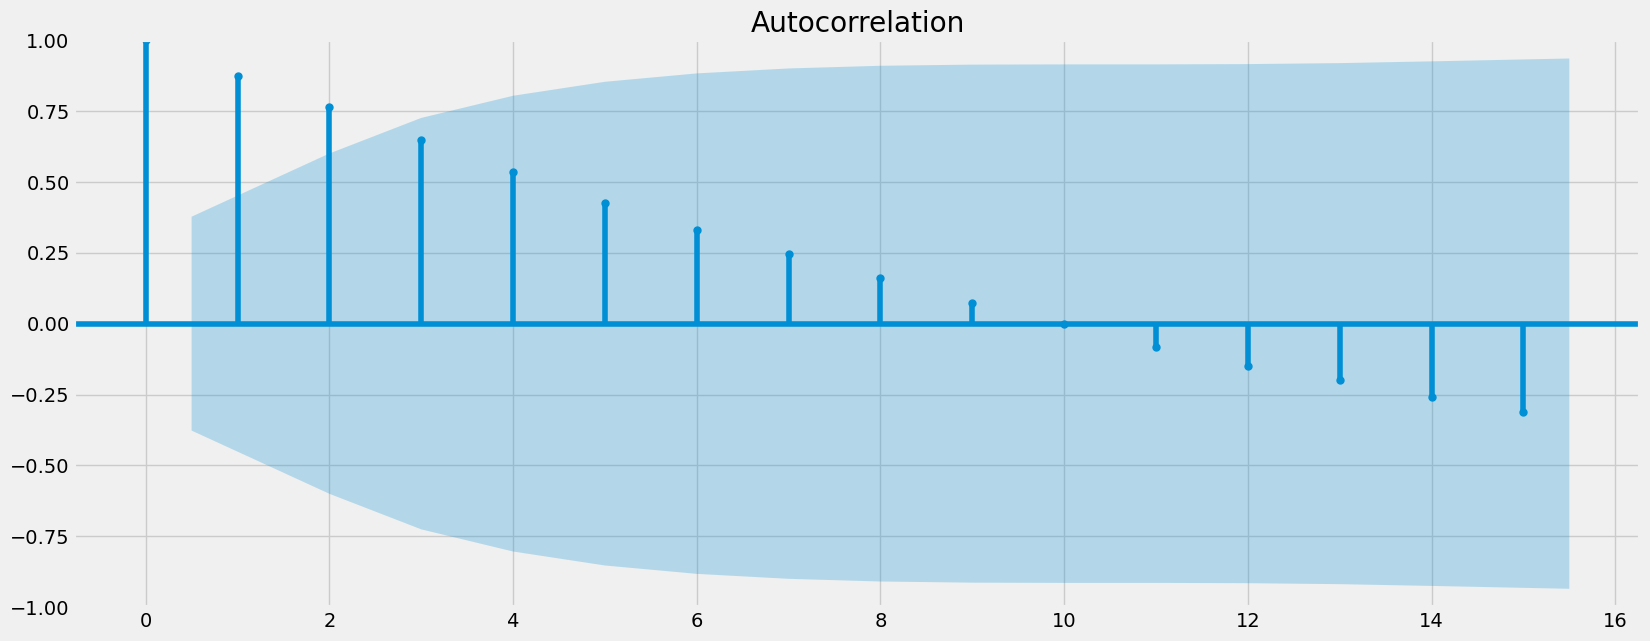

In [25]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

## Check your data's autocorrelations

The autocorrelations look good! Only three lines outside of the blue area/confidence interval, or rather lag. But based on the
Dickey-Fuller Stationarity test, it showed that the data is non-stationary. I'm guessing the plot looks the way that it does because there may
be other forms of non-stationarity not captured by the test, data set is too small, or there are some other complex patterns.

### 05 Stationarizing the OECD/PPP data

In [26]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [27]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [28]:
data_diff.head()

,PPP
Year,
1996-01-01,1034.424
1997-01-01,1182.084
1998-01-01,892.289
1999-01-01,837.234
2000-01-01,2014.504


In [29]:
data_diff.columns

Index(['PPP'], dtype='object')

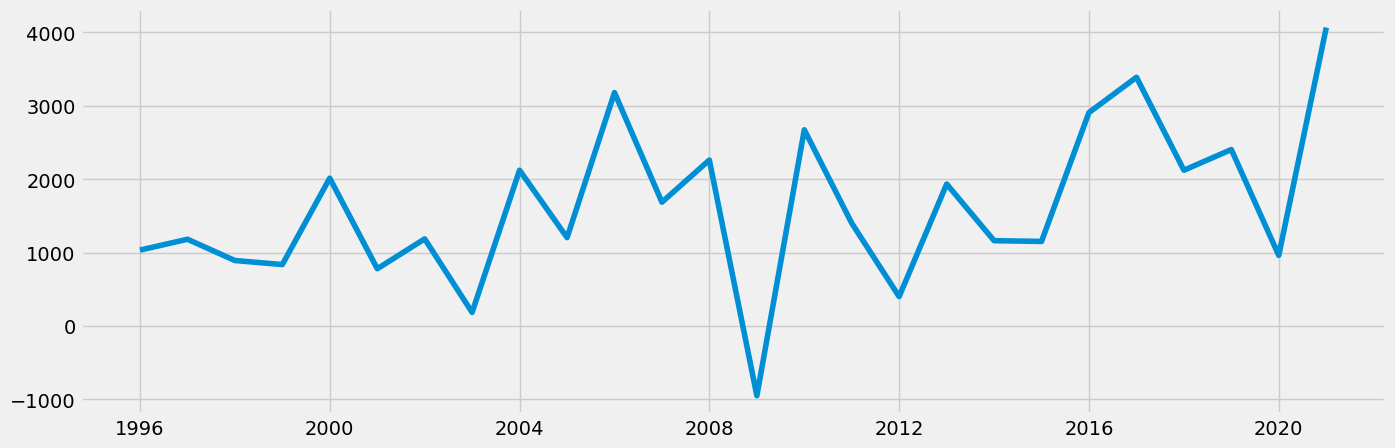

In [30]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [31]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -5.008975
p-value                         0.000021
Number of Lags Used             0.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


## Interpret the results after stationarizing the OECD data.

This time around the test is better at least since it rejects the Null hypothesis. The Test Statistic is -5.008975 which is less than the Crit Value of 5 and 10%. And the p-value is also less than the significance levels of 5 and 10%. Woohoo! Which means the data IS STATIONARY.

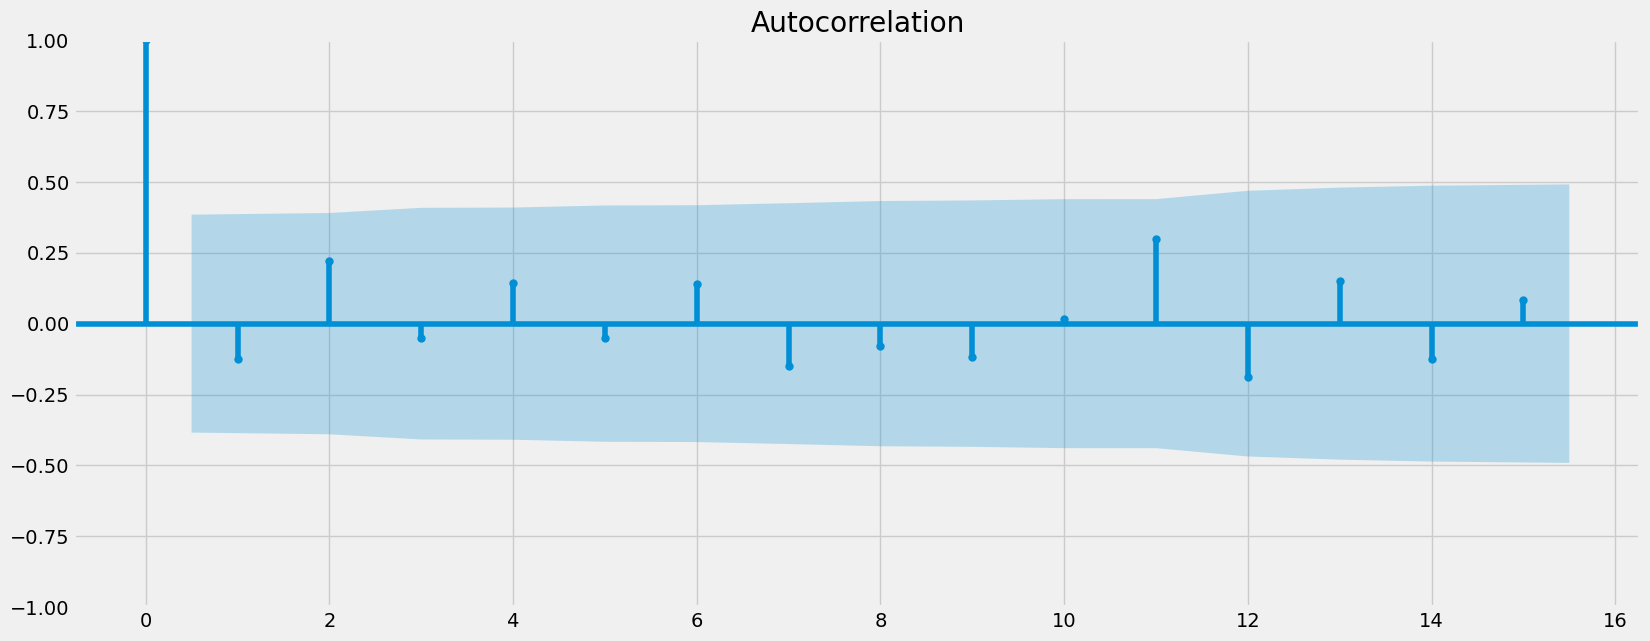

In [32]:
plot_acf(data_diff)
plt.show()

## Check your data's autocorrelations

The autocorrelations look good! Only one line outside of the blue area/confidence interval, or rather lag, further enforcing the fact that the data is stationary.

## 06 BONUS: ARIMA model

In [33]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(data_sub, order=(1, 0, 1))
result = model.fit()

In [34]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                    PPP   No. Observations:                   27
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -242.190
Date:                Tue, 07 May 2024   AIC                            492.380
Time:                        22:03:30   BIC                            497.564
Sample:                    01-01-1995   HQIC                           493.922
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.055e+04   3.42e+04      1.186      0.236   -2.64e+04    1.08e+05
ar.L1          0.9938      0.042     23.837      0.000       0.912       1.075
ma.L1          0.3615      0.259      1.398      0.1

Ljung-Box Test - Test Statistic: lb_stat
Ljung-Box Test - p-value: lb_pvalue


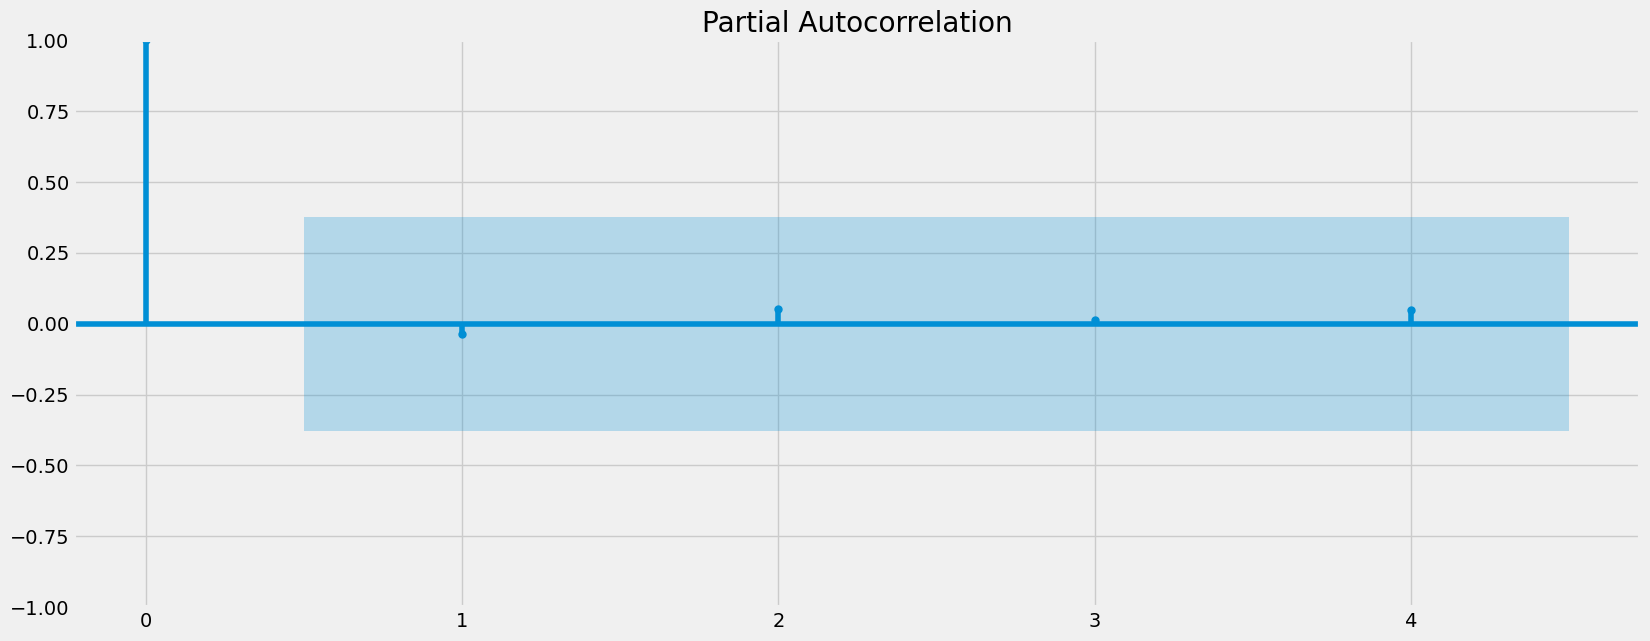

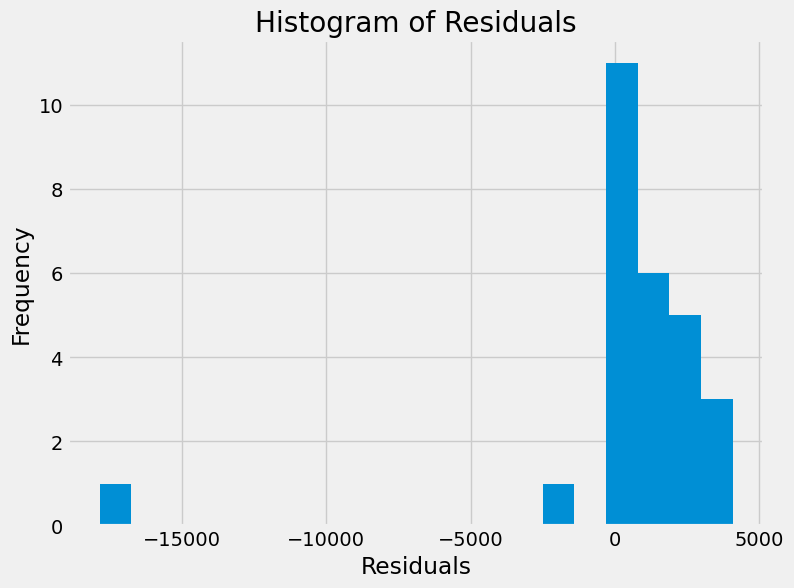

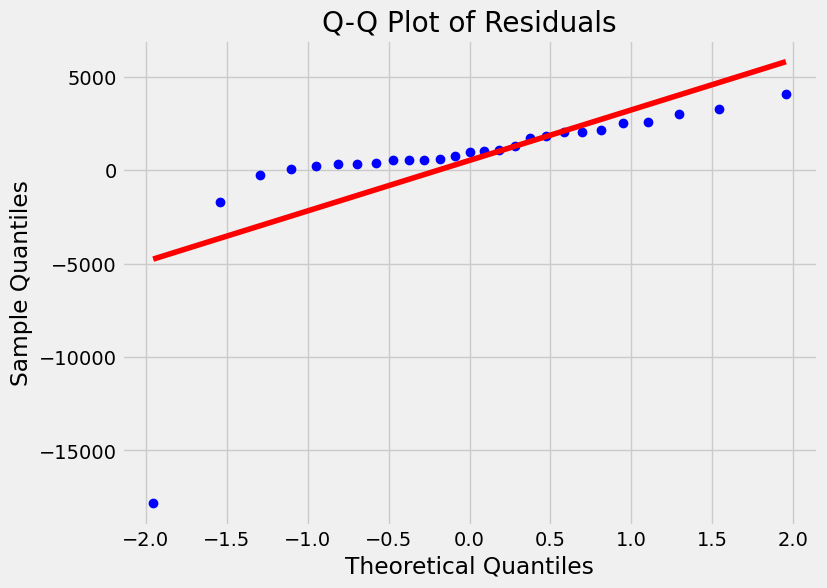

In [35]:
import scipy.stats as stats
from statsmodels.stats.diagnostic import acorr_ljungbox

# Calculate ACF and PACF of residuals
acf_resid = result.resid.autocorr(lag=4)
pacf_resid = plot_pacf(result.resid, lags=4)

# Perform Ljung-Box test for autocorrelation in residuals
lb_test_stat, lb_p_value = acorr_ljungbox(result.resid)
print("Ljung-Box Test - Test Statistic:", lb_test_stat)
print("Ljung-Box Test - p-value:", lb_p_value)

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(result.resid, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot Q-Q plot of residuals
plt.figure(figsize=(8, 6))
stats.probplot(result.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [36]:
# Forecast future values
forecast_steps = 5  # Specify the number of steps to forecast
forecast = result.forecast(steps=forecast_steps)

# Print forecasted values
print(forecast)


2022-01-01    66233.390677
2023-01-01    66073.374375
2024-01-01    65914.355133
2025-01-01    65756.326737
2026-01-01    65599.283013
Freq: AS-JAN, Name: predicted_mean, dtype: float64


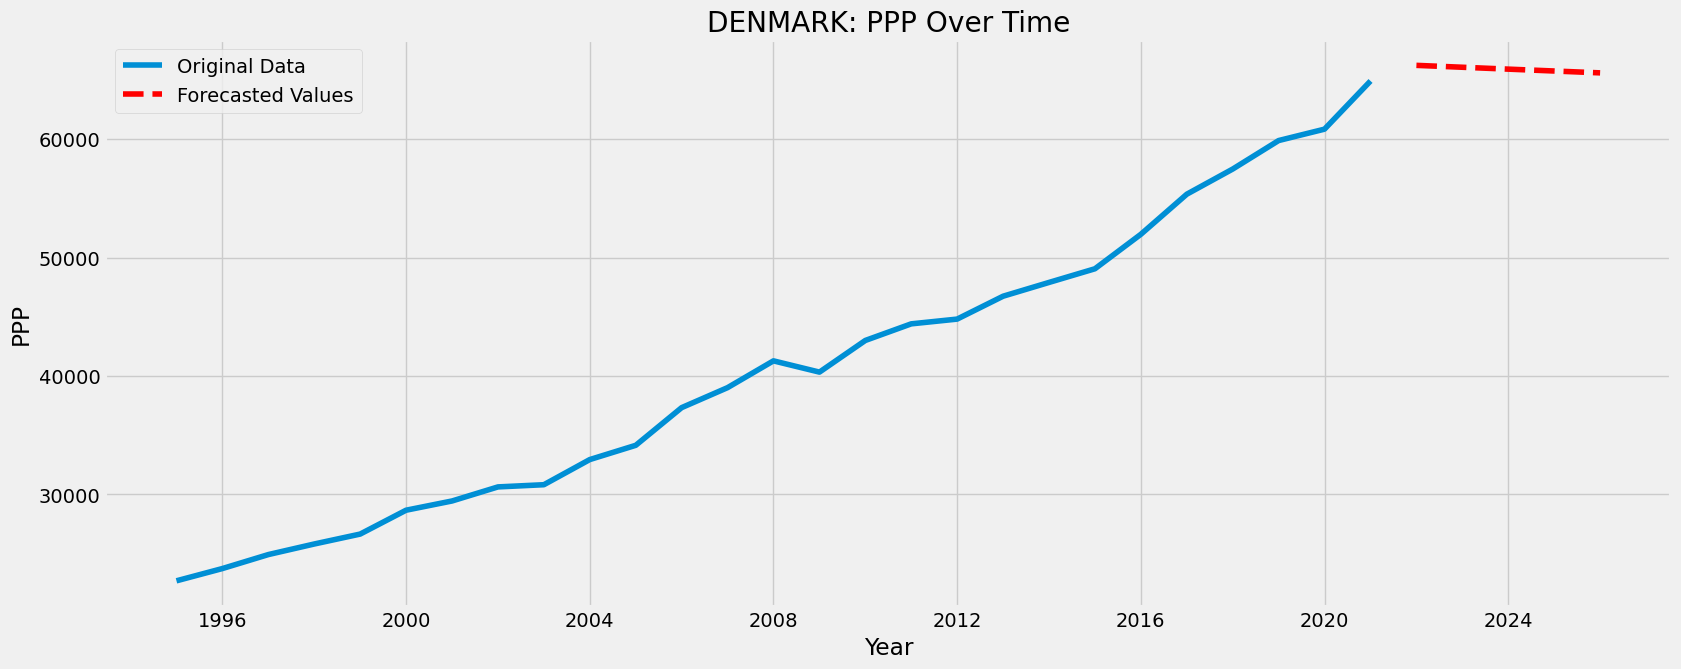

In [37]:
# Plot the original data
plt.plot(data_sub, label='Original Data')

# Plot the forecasted values
plt.plot(forecast.index, forecast, color='red', linestyle='--', label='Forecasted Values')

# Set plot labels and legend
plt.title('DENMARK: PPP Over Time')
plt.xlabel('Year')
plt.ylabel('PPP')
plt.legend()

# Show plot
plt.show()
